# Zadanie 2, Lista 4

In [1]:
import sys, os, import_ipynb
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import Moduly.Kmeans as km
import Moduly.poprawnoscGrupowania as pg
import Moduly.Preprocesing as pr

importing Jupyter notebook from /home/i309016/Zajecia/Semestr3/ED/Moduly/Kmeans.ipynb
importing Jupyter notebook from /home/i309016/Zajecia/Semestr3/ED/Moduly/poprawnoscGrupowania.ipynb
importing Jupyter notebook from /home/i309016/Zajecia/Semestr3/ED/Moduly/Preprocesing.ipynb


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as spr
import sklearn.metrics as metrics
from sklearn.cluster import Birch, DBSCAN

In [3]:
def rysWyk(X,S,No,xp=None,sp=None, nprz=None):

    probek=2*N
    
    if xp is None:
        xp=np.ones(probek)
    if sp is None:
        sp=np.ones(probek)
    if nprz is None:
        nprz=np.ones(probek)
    
    
    pg.rysujNaWykresieGrupy(X[0,:],X[1,:],xp)
    plt.show()

    pg.rysujNaWykresieGrupy(S[0,:],S[1,:],sp)
    plt.show()
    
    pg.rysujNaWykresieGrupy(No[0,:],No[1,:],nprz)
    plt.show()

In [4]:
def wyliczIndeksy(X,L):
    N=np.size(L)
    
    unikalne=np.unique(L)
    K=0
    for i in unikalne:
        if unikalne[i]>=0:
            K+=1

    maska=L>=0
            
    przynaleznosc=spr.csr_matrix((np.ones(N)[maska],(np.arange(N)[maska],L[maska])),shape=(N,K))

    print("Dunn Index:")
    print(pg.dunnIndex(X,przynaleznosc,km.kwdOdlEuklidesa))

    print("Davies-Bouldin Index:")
    print(pg.daviesBouldinIndex(X,przynaleznosc,km.kwdOdlEuklidesa))

    print("Silhouette Index:")
    print(metrics.silhouette_score(X.T,L))

## Rozkład normalny dwuwymiarowy

In [5]:
N=10000
srednia=np.array([5,10])
macierzKowariancji=np.array([[200,0],[0,1]])


X1=np.random.multivariate_normal(srednia,macierzKowariancji,size=N).T

srednia+=np.array([0,10])
X2=np.random.multivariate_normal(srednia,macierzKowariancji,size=N).T

X=np.hstack((X1,X2))

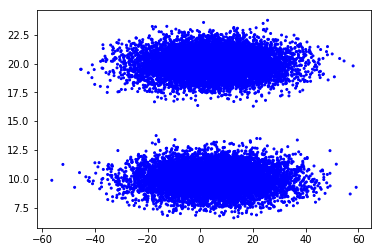

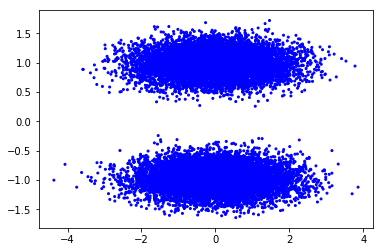

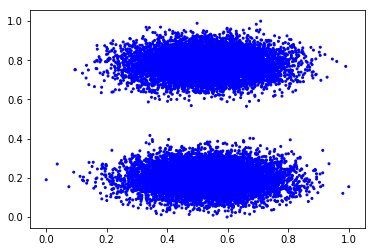

In [6]:
S=pr.standaryzacja(X)

No=pr.normalizacja(X)

rysWyk(X,S,No)

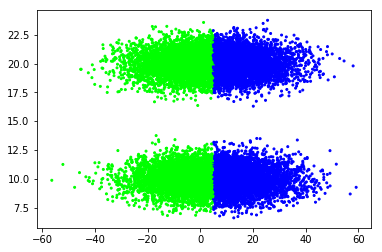

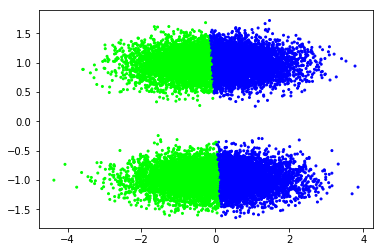

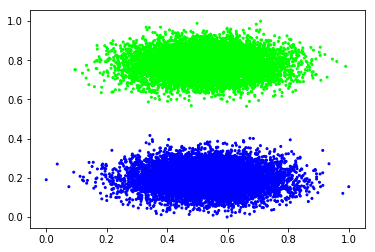

Dunn Index:
2.6360798062899904e-07
Davies-Bouldin Index:
0.38416670579412365
Silhouette Index:
0.46159202367295565
Dunn Index:
9.04199563154371e-07
Davies-Bouldin Index:
1.0613770632243833
Silhouette Index:
0.3052538887210095
Dunn Index:
0.026731784943527324
Davies-Bouldin Index:
0.10707611830031684
Silhouette Index:
0.7278366348682573


In [7]:
(centraS,przynaleznoscS)=km.kMeans(S,2)
(centraX,przynaleznoscX)=km.kMeans(X,2)
(centraN,przynaleznoscN)=km.kMeans(No,2)

przynaleznoscX=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscX).A1
przynaleznoscS=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscS).A1
przynaleznoscN=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscN).A1

rysWyk(X,S,No, xp=przynaleznoscX, sp=przynaleznoscS,nprz=przynaleznoscN)

wyliczIndeksy(X,przynaleznoscX)
wyliczIndeksy(S,przynaleznoscS)
wyliczIndeksy(No,przynaleznoscN)

## Rozkład jednostajny

In [8]:
N=10000
mnozniki=np.array([[2],[50]])
przesuniecie=np.array([[0],[0]])

X1=np.random.rand(2,N)
X1=X1*mnozniki+przesuniecie

przesuniecie+=np.array([[3],[0]])
X2=np.random.rand(2,N)
X2=X2*mnozniki+przesuniecie

X=np.hstack((X1,X2))

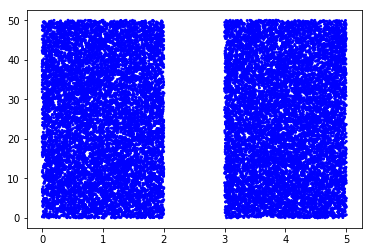

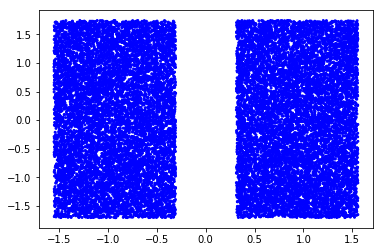

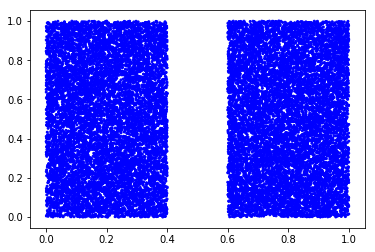

In [9]:
S=pr.standaryzacja(X)

No=pr.normalizacja(X)

rysWyk(X,S,No)

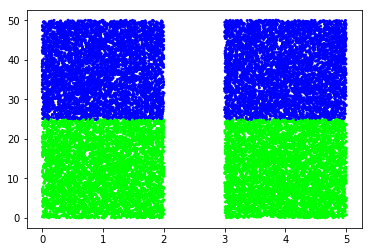

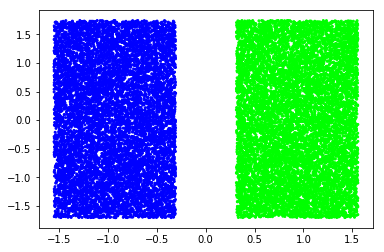

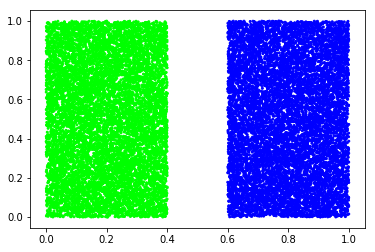

Dunn Index:
1.643909411442952e-06
Davies-Bouldin Index:
0.17197484243496108
Silhouette Index:
0.612235231377837
Dunn Index:
0.029296603789942473
Davies-Bouldin Index:
0.6478822323022857
Silhouette Index:
0.4324713345291195
Dunn Index:
0.035072565351273496
Davies-Bouldin Index:
0.5413082645127463
Silhouette Index:
0.4602530655589732


In [10]:
(centraS,przynaleznoscS)=km.kMeans(S,2)
(centraX,przynaleznoscX)=km.kMeans(X,2)
(centraN,przynaleznoscN)=km.kMeans(No,2)

przynaleznoscX=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscX).A1
przynaleznoscS=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscS).A1
przynaleznoscN=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscN).A1

rysWyk(X,S,No, xp=przynaleznoscX, sp=przynaleznoscS,nprz=przynaleznoscN)

wyliczIndeksy(X,przynaleznoscX)
wyliczIndeksy(S,przynaleznoscS)
wyliczIndeksy(No,przynaleznoscN)

# Birch

In [11]:
T=0.2
K=2
birchX = Birch(threshold=T, n_clusters=K)
birchX.fit(X.T)
birchS = Birch(threshold=T, n_clusters=K)
birchS.fit(S.T)
birchN = Birch(threshold=T, n_clusters=K)
birchN.fit(No.T)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=2,
      threshold=0.2)

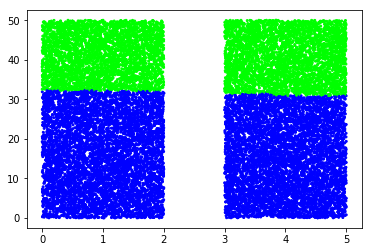

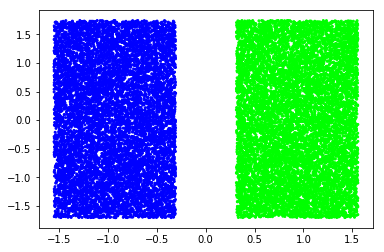

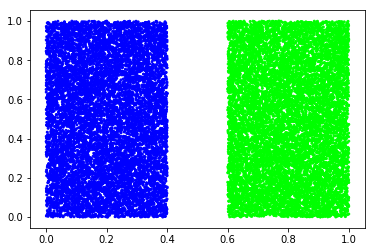

In [12]:
rysWyk(X,S,No, xp=birchX.labels_, sp=birchS.labels_, nprz=birchN.labels_)

# DBScan

In [13]:
E=0.2
Sam=25
dbscanX = DBSCAN(eps=E, min_samples=Sam)
dbscanX.fit(X.T)
dbscanS = DBSCAN(eps=E, min_samples=Sam)
dbscanS.fit(S.T)
dbscanN = DBSCAN(eps=E, min_samples=Sam)
dbscanN.fit(No.T)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=25, n_jobs=None, p=None)

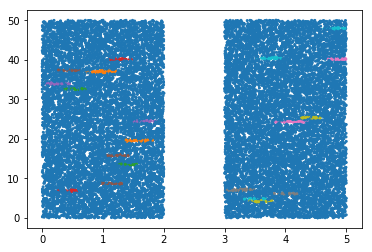

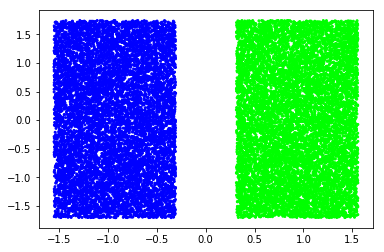

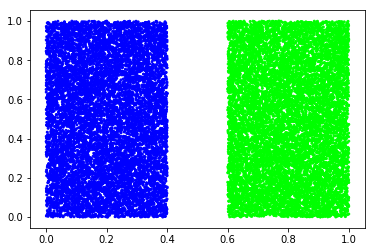

In [14]:
rysWyk(X,S,No, xp=dbscanX.labels_, sp=dbscanS.labels_, nprz=dbscanN.labels_)